### Below: 1 degree box
#### RA: 10-11degree, DEC: 0-1
https://gea.esac.esa.int/archive/

Stellarium: 16-17 stars

Gaia: 2987 stars

SQL: SELECT * 
from gaiadr2.gaia_source 
where 
RA between 10 and 11 AND
DEC between 0 and 1

In [1]:
import pandas as pd
one_degree_box = pd.read_csv("1degree.csv")
one_degree_box.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,...,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper
count,2.987000e+03,2.987000e+03,2.987000e+03,2987.0,2987.000000,2987.000000,2987.000000,2987.000000,2362.000000,2362.000000,...,401.000000,401.000000,401.000000,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,1.635721e+18,2.545348e+18,8.348150e+08,2015.5,10.493477,2.463617,0.497418,1.399731,1.118871,0.515015,...,0.145748,0.080983,0.232484,200111.0,1.146199,1.037363,1.228500,2.469787,2.134659,2.804914
std,0.000000e+00,2.906554e+15,4.872723e+08,0.0,0.294380,7.761182,0.289191,4.448988,1.631237,0.463866,...,0.164295,0.124251,0.199014,0.0,1.541179,1.378242,1.635531,13.575517,10.984913,16.270136
min,1.635721e+18,2.543035e+18,1.729800e+04,2015.5,10.000043,0.020369,0.000095,0.014438,-5.938072,0.022573,...,0.003000,0.000000,0.017100,200111.0,0.500944,0.348610,0.508067,0.030641,0.029643,0.031640
25%,1.635721e+18,2.543104e+18,4.181524e+08,2015.5,10.236596,0.167316,0.241739,0.111729,0.274800,0.138554,...,0.037000,0.006900,0.093100,200111.0,0.657643,0.589448,0.704749,0.188104,0.171484,0.201126
50%,1.635721e+18,2.543315e+18,8.389194e+08,2015.5,10.485396,0.496462,0.488284,0.357365,0.859963,0.382675,...,0.093000,0.032600,0.168300,200111.0,0.833459,0.757096,0.890149,0.466593,0.407986,0.532451
75%,1.635721e+18,2.549134e+18,1.255057e+09,2015.5,10.754713,1.217741,0.747516,0.866748,1.713874,0.760717,...,0.192300,0.107000,0.304600,200111.0,1.088864,1.017593,1.195962,1.154610,1.032632,1.304638
max,1.635721e+18,2.549394e+18,1.691948e+09,2015.5,10.999717,88.285228,0.999616,62.026589,28.199629,3.248399,...,1.065500,0.821900,1.213100,200111.0,19.346436,17.540230,20.250835,197.145390,145.256930,249.033840


In [2]:
N = len(one_degree_box)
print('Data loaded. Contains {} samles.'.format(N))

Data loaded. Contains 2987 samles.


### How many parallaxes are negative?

In [3]:
import math
#greater than 0 parallax
above = one_degree_box[ 0 < one_degree_box.parallax]
#less than 0 parallax
below = one_degree_box[ 0 >= one_degree_box.parallax]

a = above.shape[0]
b = below.shape[0]

print(a)
print(b)

b / (b+a)

1986
376


0.15918712955122777

In [4]:
import matplotlib
import matplotlib.pyplot as plt
data = one_degree_box[['ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'phot_g_mean_flux', 'phot_g_mean_mag', 'b', 'l']]
plt.hist(data['parallax'], bins=100)
plt.show()

/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 640x480 with 1 Axes>

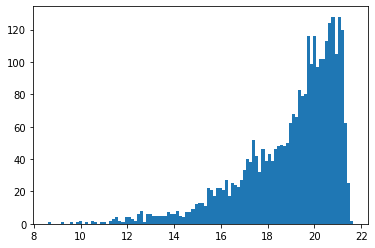

In [5]:
plt.hist(data['phot_g_mean_mag'], bins=100)
plt.show()

## Find distance
distance = 1/parallax

Transverse velocity in right ascension: vTra(km/s) = pmra(arcsec/yr) * d * 4.740

Transverse velocity in declination: vTdec(km/s) = pmdec(arcsec/yr) * d * 4.740

#### parallax: 
- arcseconds or milliarcseconds
- apparent shift of position of any nearby star against the background of distant objects
- "Parallax uncertainties are in the range of up to 0.04 milliarcsecond for sources at G < 15, around 0.1 mas for sources with G=17 and at the faint end"

#### proper motion: 
- arcseconds per year or milliarcseconds per year
- angular velocity across the sky exhibited by a celestial body
- vR, the star's radial velocity
- pmra, the component of proper motion in right ascension, and
- pmdec, the component of proper motion in declination.

In [6]:
data.head(5)

,ra,dec,parallax,parallax_error,pmra,pmdec,phot_g_mean_flux,phot_g_mean_mag,b,l
0,10.910672,0.153058,NaN,NaN,NaN,NaN,144.412272,20.289356,-62.654417,118.686394
1,10.859938,0.153501,0.345412,0.723004,4.188321,-8.079128,188.297027,20.001257,-62.650588,118.576266
2,10.901538,0.155252,-0.208778,0.893954,1.454527,-1.324278,120.151203,20.489046,-62.651624,118.666870
3,10.683739,0.019205,0.382521,0.317710,-1.734745,-2.584722,521.258231,18.895733,-62.772088,118.172197
4,10.636041,0.040811,NaN,NaN,NaN,NaN,90.379070,20.798197,-62.746982,118.071804


In [7]:
#change parallax from milliarcseconds to arcseconds
data.loc[:,'parallax_arcsec'] = data['parallax'].apply(lambda x: x*.001)
data.head(10)

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,ra,dec,parallax,parallax_error,pmra,pmdec,phot_g_mean_flux,phot_g_mean_mag,b,l,parallax_arcsec
0,10.910672,0.153058,NaN,NaN,NaN,NaN,144.412272,20.289356,-62.654417,118.686394,NaN
1,10.859938,0.153501,0.345412,0.723004,4.188321,-8.079128,188.297027,20.001257,-62.650588,118.576266,0.000345
2,10.901538,0.155252,-0.208778,0.893954,1.454527,-1.324278,120.151203,20.489046,-62.651624,118.666870,-0.000209
3,10.683739,0.019205,0.382521,0.317710,-1.734745,-2.584722,521.258231,18.895733,-62.772088,118.172197,0.000383
4,10.636041,0.040811,NaN,NaN,NaN,NaN,90.379070,20.798197,-62.746982,118.071804,NaN
5,10.713029,0.082916,NaN,NaN,NaN,NaN,87.414204,20.834412,-62.710694,118.246169,NaN
6,10.610089,0.036868,4.141359,0.180118,58.473849,-26.433618,1171.855152,18.016180,-62.748946,118.014638,0.004141
7,10.852308,0.252707,NaN,NaN,NaN,NaN,469.598765,19.009048,-62.551093,118.574299,NaN
8,10.822123,0.091510,NaN,NaN,NaN,NaN,105.246325,20.632849,-62.709852,118.484839,NaN
9,10.833893,0.226309,-0.008680,0.535908,-1.973189,-0.573069,324.343102,19.410854,-62.576179,118.530532,-0.000009


In [8]:
def distance(x):
    #it shouldn't be less than 0 since I'm not getting any negative parallaxes from Gaia
    if x < 0:
        return 0
    else:
        return 1/x

data.loc[:, 'distance_pc'] = data['parallax_arcsec'].apply(distance)

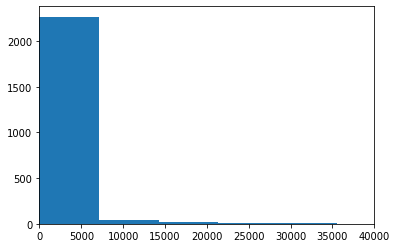

In [9]:
plt.hist(data['distance_pc'], label='distance_pc', bins=100)
plt.xlim(0,40000) #helps narrow down outliers
plt.show()

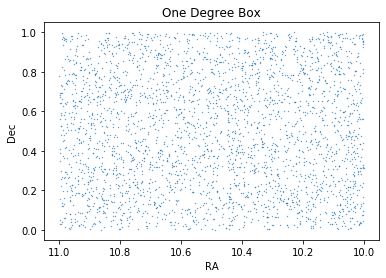

In [14]:
plt.scatter(data['ra'], data['dec'], s=0.1)
plt.gca().invert_xaxis()
plt.xlabel("RA")
plt.ylabel("Dec")
plt.title("One Degree Box")
plt.show()

### Below: graph of brightest 17 stars in gaia for same boxed area as above
Compare to Stellarium

In [10]:
sort_by_mag = data.sort_values('phot_g_mean_mag')
sort_by_mag_result = sort_by_mag.head(15)

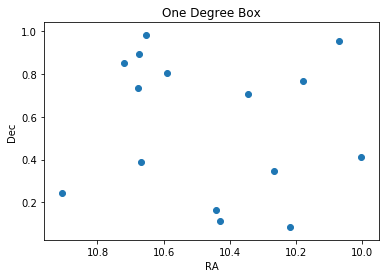

In [11]:
#from Earth's point of view
plt.scatter(sort_by_mag_result['ra'], sort_by_mag_result['dec'])
plt.gca().invert_xaxis()
plt.xlabel("RA")
plt.ylabel("Dec")
plt.title("One Degree Box")
plt.show()

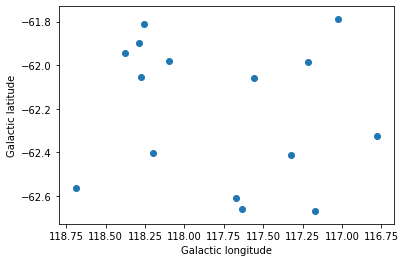

In [12]:
#from outside the galaxy point of view
plt.scatter(sort_by_mag_result['l'], sort_by_mag_result['b'])
plt.gca().invert_xaxis()
plt.xlabel("Galactic longitude")
plt.ylabel("Galactic latitude")
plt.show()